# BBL588E Homework 2
Yüksel Kapan - 7004191018

### Notice

Professor, I couldn't upload my previous Homework 1 to the system because I misremembered the homework deadline being as same as the project proposal deadline. 

I have mailed about it to you but I appears you have not seen the e-mail. 

I had mostly finished the homework many days before the actual deadline, however I wanted to upload the homework and the project proposal on the same day (not knowing their deadlines were different). Due to this misunderstanding, my score for the homework is 0. As homeworks has a major impact on the final grade, I kindly request you to please reconsider the grading for my Homework 1 as I actually worked really hard on the homework and provided solutions for all problems and explored alternative solutions.

Here is the link to the repository: https://github.com/yukosgiti/BBL588

You can check from the commit history that most of the homework was indeed finished before the deadline. 

Thank you!

Also, the code for this notebook can be located at: https://github.com/yukosgiti/BBL_588_HW_2


## Question 1

* Segment the “Sunny Lake” image using k-means algorithm. 
* Use different k-values and compare your results.

* You may try with different feature vectors, as well. For example, you may want to convert the colored image to greyscale and try only using the greyscale values as the feature “vector”. 

* Or else, you may build a feature vector composed of greyscale value and locations of the pixels. Or else, you may use color values (R, G, B) augmented with the locations. You may even utilize a filter bank accounting for different textures. 

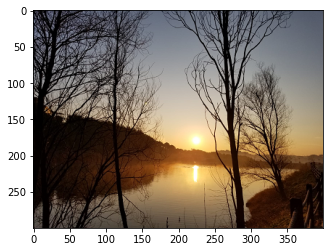

In [2]:
# Load image
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
sunny_lake = plt.imread("./data/SunnyLake.bmp")/255 # Read and rescale so the values are in [0.0, 1.0].
plt.imshow(sunny_lake)

In [5]:
# Inspired from the following link.
# https://dzone.com/articles/cluster-image-with-k-means

# Shape of sunny_lake is (300, 400, 3). 
# However to use kmeans cluestering we need to reshape it to 2D. E.g. (x, y, color) => (x*y, color)
x, y, z = sunny_lake.shape
sunny_lake_2d = sunny_lake.reshape(x*y, z)

## Segmentation for `k = 2`.

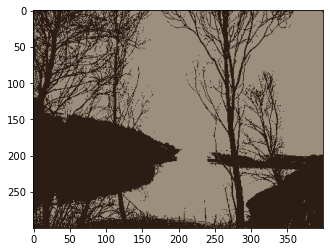

In [11]:
from sklearn.cluster import KMeans

# Inspired from...
# https://stackoverflow.com/a/47152316

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(sunny_lake_2d)

# Based on the clusters calculate segments
segmented_sunny_lake = kmeans.cluster_centers_[kmeans.labels_]

# Reshape it back to the original 3D from 2D. 
segmented_sunny_lake = segmented_sunny_lake.reshape(sunny_lake.shape)
plt.imshow(segmented_sunny_lake)

## Segmentation for `k = 4`.

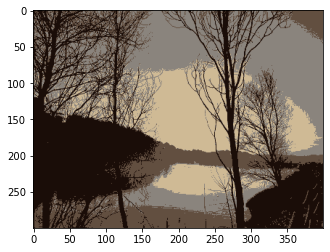

In [12]:
from sklearn.cluster import KMeans

# Inspired from...
# https://stackoverflow.com/a/47152316

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(sunny_lake_2d)

# Based on the clusters calculate segments
segmented_sunny_lake = kmeans.cluster_centers_[kmeans.labels_]

# Reshape it back to the original 3D from 2D. 
segmented_sunny_lake = segmented_sunny_lake.reshape(sunny_lake.shape)
plt.imshow(segmented_sunny_lake)

## Segmentation for `k = 8`.

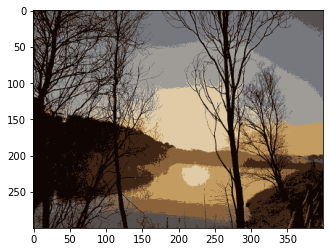

In [13]:
from sklearn.cluster import KMeans

# Inspired from...
# https://stackoverflow.com/a/47152316

kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(sunny_lake_2d)

# Based on the clusters calculate segments
segmented_sunny_lake = kmeans.cluster_centers_[kmeans.labels_]

# Reshape it back to the original 3D from 2D. 
segmented_sunny_lake = segmented_sunny_lake.reshape(sunny_lake.shape)
plt.imshow(segmented_sunny_lake)

## Grayscale image

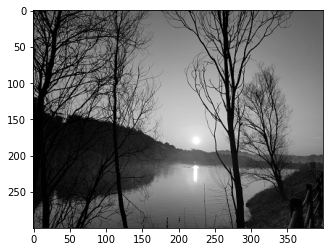

In [34]:
sunny_lake_2d_gray = np.average(sunny_lake_2d, axis=1)
sunny_lake_gray = sunny_lake_2d_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(sunny_lake_gray, cmap='gray')

## Grayscale segmentation for `k = 2`

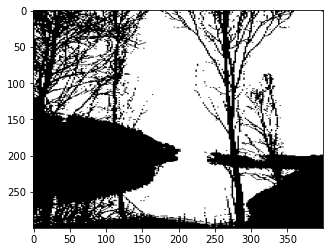

In [59]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(sunny_lake_gray.reshape(-1, 2))

# Based on the clusters calculate segments
segmented_sunny_lake_gray = kmeans.cluster_centers_[kmeans.labels_].reshape((sunny_lake.shape[0], sunny_lake.shape[1]))

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Grayscale segmentation for `k = 4`

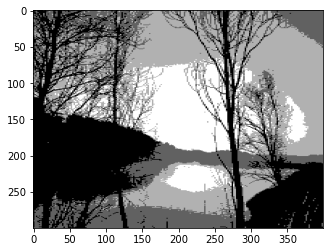

In [61]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(sunny_lake_gray.reshape(-1, 2))

# Based on the clusters calculate segments
segmented_sunny_lake_gray = kmeans.cluster_centers_[kmeans.labels_].reshape((sunny_lake.shape[0], sunny_lake.shape[1]))

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Grayscale segmentation for `k = 8`

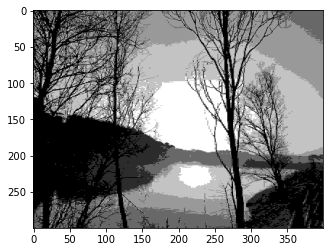

In [62]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(sunny_lake_gray.reshape(-1, 2))

# Based on the clusters calculate segments
segmented_sunny_lake_gray = kmeans.cluster_centers_[kmeans.labels_].reshape((sunny_lake.shape[0], sunny_lake.shape[1]))

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Question 2

* Segment the image using mean-shift clustering based segmentation. 
* Compare your results with the ones you found in 1. 
* For the mean-shift image segmentation you may require to set the window size. 
* Report your results for various window sizes. As for 1., you may utilize mean-shift segmentation for greyscale version of the image, as well as, for the colored version.
* Compare your results with the ones in 1

## Grayscale MeanShift for `bandwidth=0.1`

0.21606584245188065


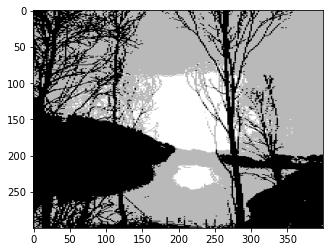

In [105]:
# Adapted from
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=0.1, bin_seeding=True)
ms.fit(sunny_lake_2d_gray.reshape(-1, 2))

# Based on the clusters calculate segments
segmented_sunny_lake_gray = ms.cluster_centers_[ms.labels_].reshape((sunny_lake.shape[0], sunny_lake.shape[1]))

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Grayscale MeanShift for `bandwidth=0.2`

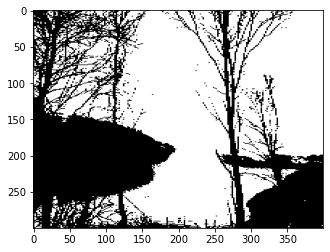

In [106]:
ms = MeanShift(bandwidth=0.2, bin_seeding=True)
ms.fit(sunny_lake_2d_gray.reshape(-1, 2))

# Based on the clusters calculate segments
segmented_sunny_lake_gray = ms.cluster_centers_[ms.labels_].reshape((sunny_lake.shape[0], sunny_lake.shape[1]))

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Grayscale MeanShift for `bandwidth=0.3`

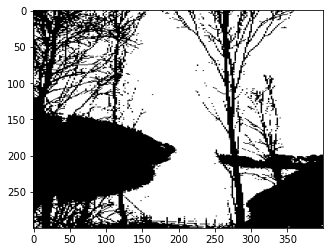

In [107]:
ms = MeanShift(bandwidth=0.3, bin_seeding=True)
ms.fit(sunny_lake_2d_gray.reshape(-1, 2))

# Based on the clusters calculate segments
segmented_sunny_lake_gray = ms.cluster_centers_[ms.labels_].reshape((sunny_lake.shape[0], sunny_lake.shape[1]))

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape((sunny_lake.shape[0], sunny_lake.shape[1]))
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Colored MeanShift for `bandwidth=0.15`

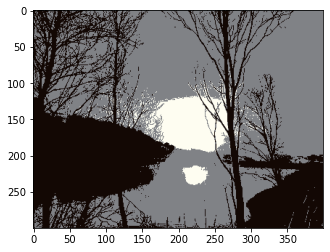

In [114]:
ms = MeanShift(bandwidth=0.15, bin_seeding=True)
ms.fit(sunny_lake_2d)

# Based on the clusters calculate segments
segmented_sunny_lake_gray = ms.cluster_centers_[ms.labels_].reshape(sunny_lake.shape)

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape(sunny_lake.shape)
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Colored MeanShift for `bandwidth=0.1`

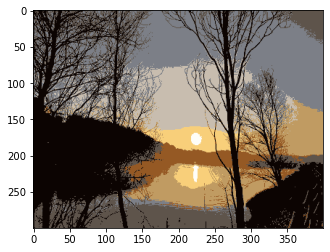

In [116]:
ms = MeanShift(bandwidth=0.1, bin_seeding=True)
ms.fit(sunny_lake_2d)

# Based on the clusters calculate segments
segmented_sunny_lake_gray = ms.cluster_centers_[ms.labels_].reshape(sunny_lake.shape)

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape(sunny_lake.shape)
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

## Colored MeanShift for `bandwidth=0.05`

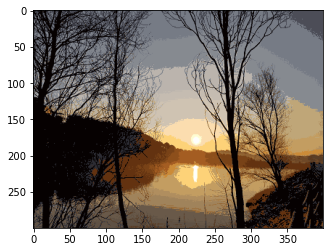

In [115]:
ms = MeanShift(bandwidth=0.05, bin_seeding=True)
ms.fit(sunny_lake_2d)

# Based on the clusters calculate segments
segmented_sunny_lake_gray = ms.cluster_centers_[ms.labels_].reshape(sunny_lake.shape)

# Reshape it back...
segmented_sunny_lake_gray = segmented_sunny_lake_gray.reshape(sunny_lake.shape)
plt.imshow(segmented_sunny_lake_gray, cmap='gray')

# Comments on the results

From my testing, the KMeans algortihm performs better on colored images, as the MeanShift algortihm not only takes too much time, but also produces "gradient like" images. Since we want broader segments, in my opinion, KMeans performs better. 

As for the grayscale images, the MeanShift segments the image better than the KMeans algortihm. The only problem with Kmeans for me was that the algortihm ran quite slow.
